In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv("/content/archive (3).zip")
print(df)

      User ID Subscription Type  Monthly Revenue Join Date Last Payment Date  \
0           1             Basic               10  15-01-22          10-06-23   
1           2           Premium               15  05-09-21          22-06-23   
2           3          Standard               12  28-02-23          27-06-23   
3           4          Standard               12  10-07-22          26-06-23   
4           5             Basic               10  01-05-23          28-06-23   
...       ...               ...              ...       ...               ...   
2495     2496           Premium               14  25-07-22          12-07-23   
2496     2497             Basic               15  04-08-22          14-07-23   
2497     2498          Standard               12  09-08-22          15-07-23   
2498     2499          Standard               13  12-08-22          12-07-23   
2499     2500             Basic               15  13-08-22          12-07-23   

             Country  Age  Gender      

In [ ]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [ ]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
(2500, 10)


In [ ]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [ ]:
missing_values = df.isnull().any()
missing_values

User ID              False
Subscription Type    False
Monthly Revenue      False
Join Date            False
Last Payment Date    False
Country              False
Age                  False
Gender               False
Device               False
Plan Duration        False
dtype: bool

In [ ]:
count_by_category = df['Subscription Type'].value_counts()
print(count_by_category)

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64


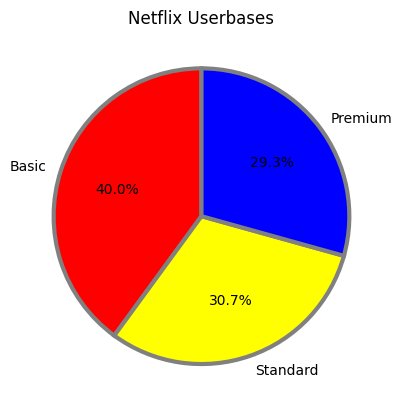

In [ ]:
categories = ['Basic', 'Standard', 'Premium']
values = [999, 768, 733]
colors = ['red', 'yellow', 'blue']
fig, ax = plt.subplots()
wedge_props = {'linewidth': 3, 'edgecolor': 'grey'}
ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=wedge_props)
ax.set_title('Netflix Userbases')
plt.show()

In [ ]:
count_by_country = df['Country'].value_counts()
print(count_by_country)

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64


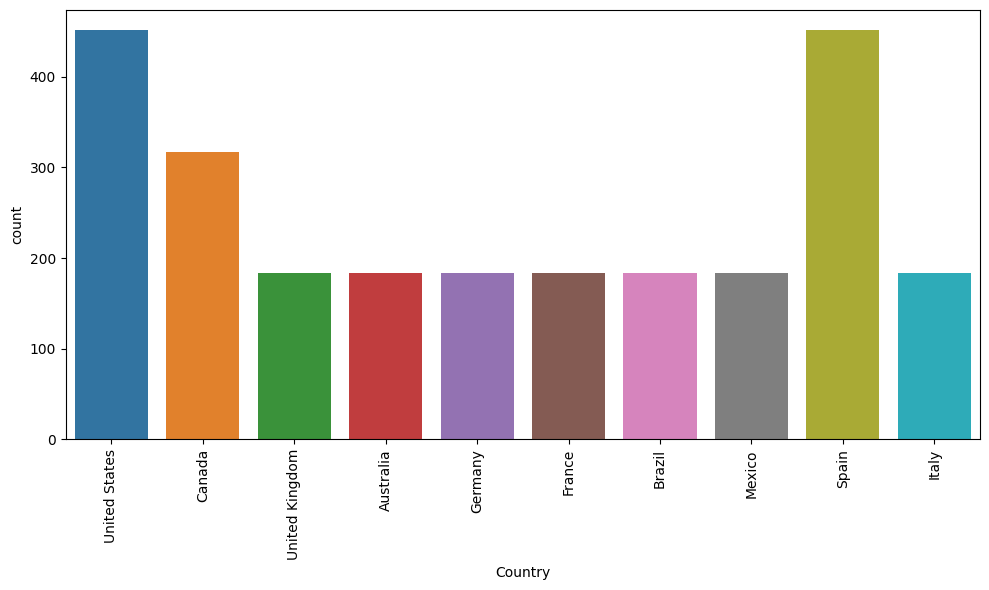

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
count_by_gender = df['Gender'].value_counts()
print(count_by_gender)

Female    1257
Male      1243
Name: Gender, dtype: int64


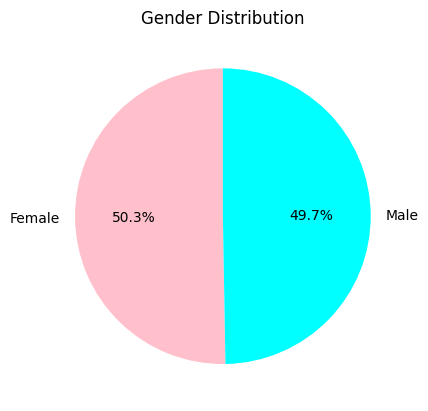

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'cyan'])
plt.title('Gender Distribution')
plt.show()


In [ ]:
df['Device'].value_counts(normalize=True) * 100

Laptop        25.44
Tablet        25.32
Smartphone    24.84
Smart TV      24.40
Name: Device, dtype: float64

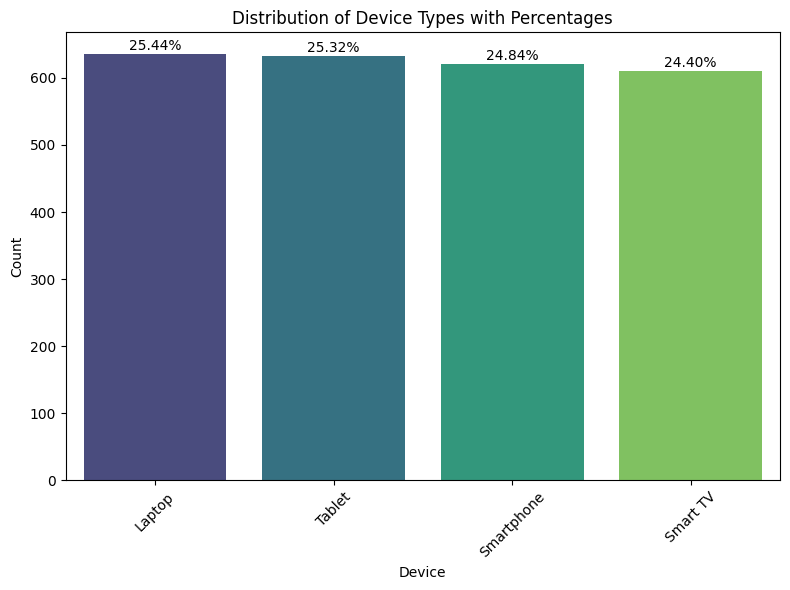

In [ ]:
device_counts = df['Device'].value_counts()
device_percentages = df['Device'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=device_counts.index, y=device_counts.values, palette='viridis')
for i, count in enumerate(device_counts):
    plt.text(i, count + 1, f'{device_percentages[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distribution of Device Types with Percentages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])
df['Date Difference (Days)'] = (df['Last Payment Date'] - df['Join Date']).dt.days
print(df[['Join Date', 'Last Payment Date', 'Date Difference (Days)']])

      Join Date Last Payment Date  Date Difference (Days)
0    2022-01-15        2023-10-06                     629
1    2021-05-09        2023-06-22                     774
2    2023-02-28        2023-06-27                     119
3    2022-10-07        2023-06-26                     262
4    2023-01-05        2023-06-28                     174
...         ...               ...                     ...
2495 2022-07-25        2023-12-07                     500
2496 2022-04-08        2023-07-14                     462
2497 2022-09-08        2023-07-15                     310
2498 2022-12-08        2023-12-07                     364
2499 2022-08-13        2023-12-07                     481

[2500 rows x 3 columns]


      User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0           1             Basic               10 2022-01-15        2023-10-06   
1           2           Premium               15 2021-05-09        2023-06-22   
2           3          Standard               12 2023-02-28        2023-06-27   
3           4          Standard               12 2022-10-07        2023-06-26   
4           5             Basic               10 2023-01-05        2023-06-28   
...       ...               ...              ...        ...               ...   
2495     2496           Premium               14 2022-07-25        2023-12-07   
2496     2497             Basic               15 2022-04-08        2023-07-14   
2497     2498          Standard               12 2022-09-08        2023-07-15   
2498     2499          Standard               13 2022-12-08        2023-12-07   
2499     2500             Basic               15 2022-08-13        2023-12-07   

             Country  Age  

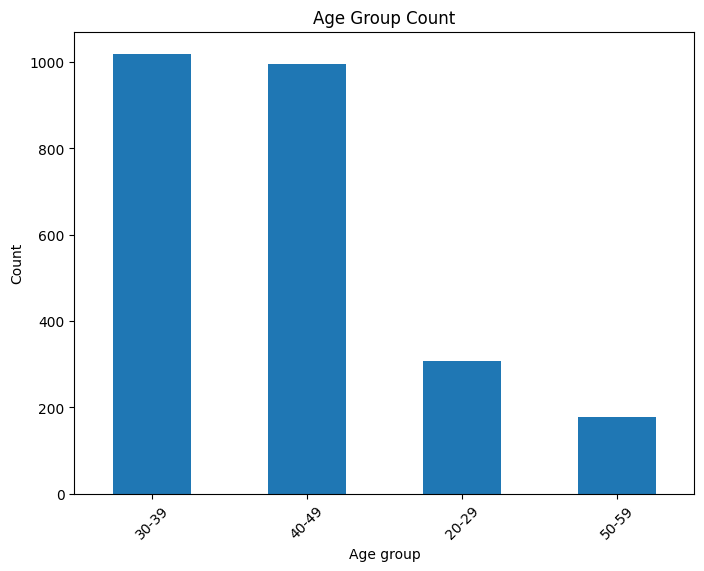

In [ ]:
age_bin = [20,30,40,50,60]
age_label = ['20-29', '30-39', '40-49', '50-59']
df['Age group'] = pd.cut(df['Age'], bins=age_bin, labels=age_label, right=False)
print(df)
age_group_count = df['Age group'].value_counts()
plt.figure(figsize = (8,6))
age_group_count.plot(kind='bar')
plt.title('Age Group Count')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

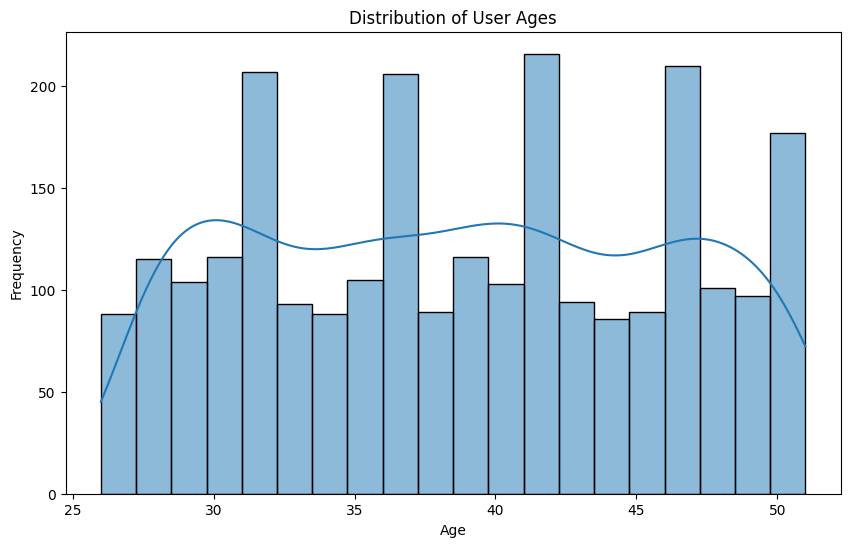

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

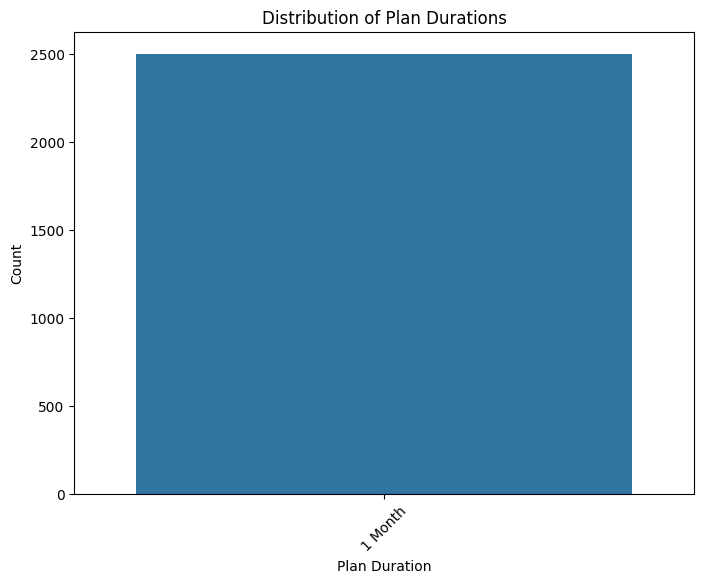

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Plan Duration')
plt.title('Distribution of Plan Durations')
plt.xlabel('Plan Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

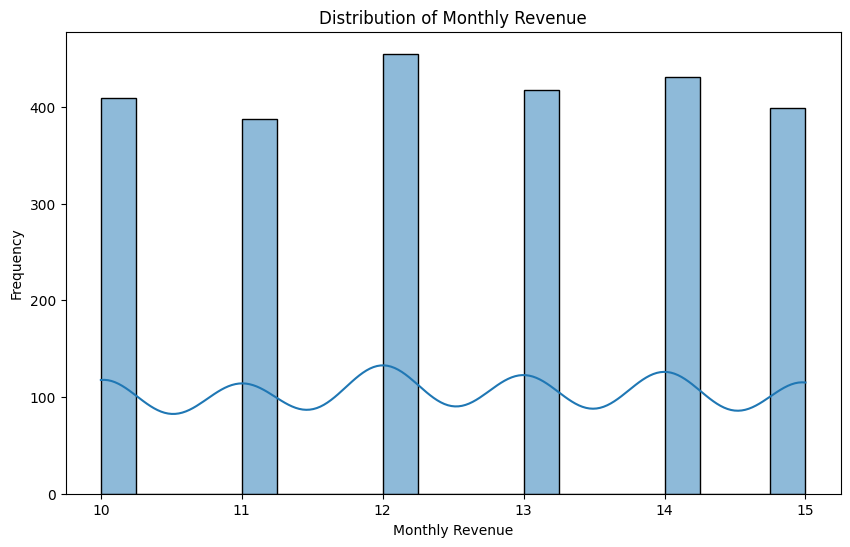

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Monthly Revenue', bins=20, kde=True)
plt.title('Distribution of Monthly Revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.show()

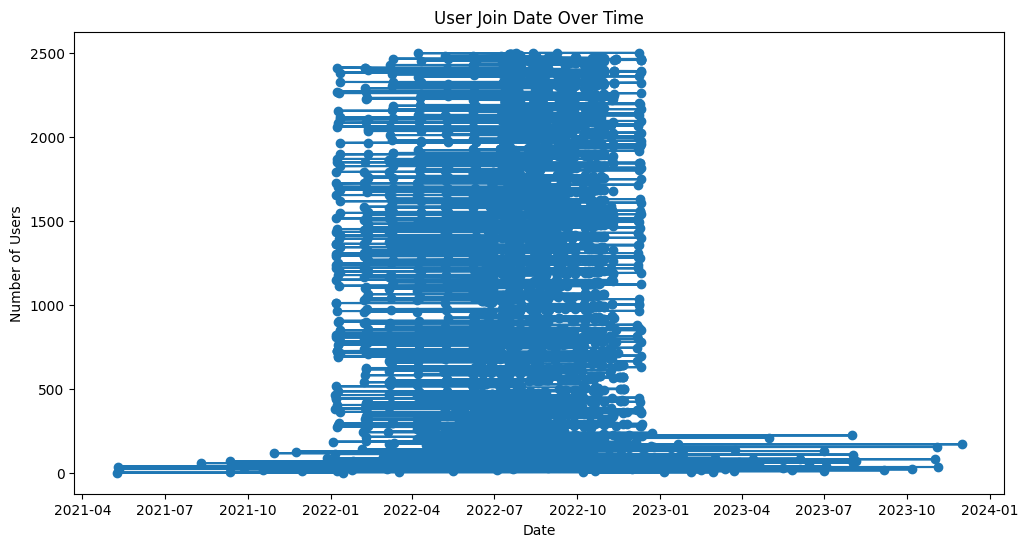

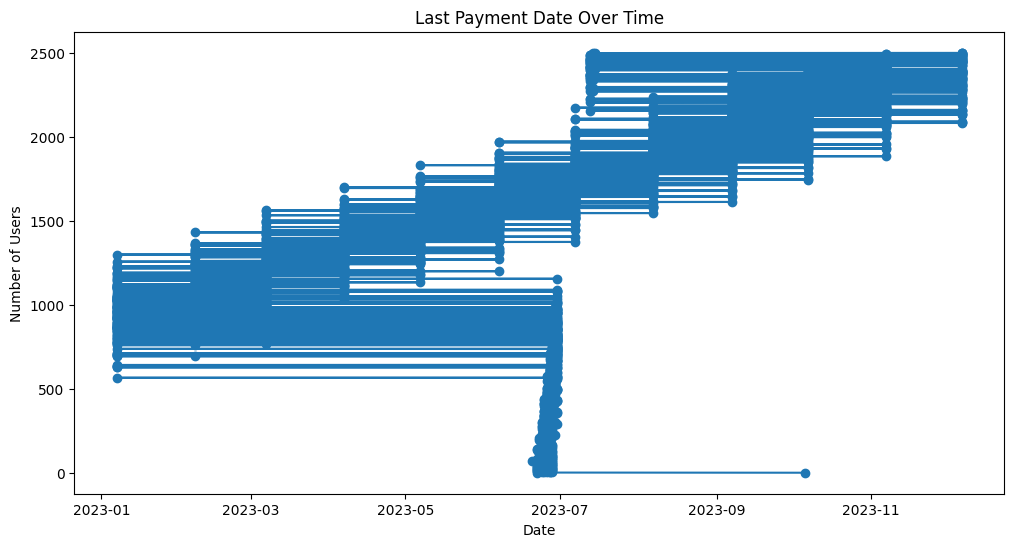

In [ ]:
# Convert date columns to datetime format
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

# Line plot of Join Date over time
plt.figure(figsize=(12, 6))
plt.plot(df['Join Date'], df.index, marker='o', linestyle='-')
plt.title('User Join Date Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show()

# Line plot of Last Payment Date over time
plt.figure(figsize=(12, 6))
plt.plot(df['Last Payment Date'], df.index, marker='o', linestyle='-')
plt.title('Last Payment Date Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.show()